In [1]:
%cd ..

/home/noaman/Desktop/smartbricks


In [13]:
import joblib
import pandas as pd
from preprocess import *
from feature_selection import *

import config

def load_models():
    """
    Load the trained base models and the meta-learner.
    """
    base_models = {}
    for name, path in config.MODEL_SAVE_PATHS.items():
        model_name = name.replace("_", " ").title()
        base_models[model_name] = joblib.load(path)
    
    meta_learner = joblib.load(config.META_MODEL_PATH)
    return base_models, meta_learner

In [7]:
df = pd.read_csv("/home/noaman/Desktop/smartbricks/data/processed_rents.csv") 

In [8]:
# Sample a single row
row = df.sample(n=1)

# Reset the index to ensure proper alignment
temp = row.reset_index(drop=True)
temp

,contract_start_date,contract_end_date,version_number,version_text,contract_amount,annual_amount,is_freehold,property_size_sqm,property_type_en,property_subtype_en,...,total_properties,rooms,parking,project_name_en,area_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,master_project_en,contract_duration
0,0.895582,0.902938,0.042867,0.031639,-0.425618,-0.481014,0.276453,-0.268626,0.51964,-1.788526,...,-0.441943,0.031639,-0.12017,0.089803,-0.581075,0.82762,-0.837781,-0.399634,0.0,-0.094785


In [16]:
rent_features=['property_subtype_en', 'property_size_sqm', 'total_properties', 'nearest_mall_en', 'contract_end_date', 'area_en', 'nearest_landmark_en', 'version_number', 'contract_amount', 'contract_duration', 'contract_start_date', 'annual_amount', 'nearest_metro_en']

In [33]:
meta_learner.output_shape

(None, 1)

In [34]:
# Load trained models
base_models, meta_learner = load_models()

# Make predictions using base models
base_model_predictions = np.array([
    model.predict(df[rent_features]) for model in base_models.values()
]).T
base_model_predictions = base_model_predictions.reshape(len(df), -1)
# # Make predictions using the meta-learner
final_predictions = meta_learner.predict(base_model_predictions)

print("Base model predictions shape:", base_model_predictions.shape)
print("Final predictions shape:", final_predictions.shape)
    

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Base model predictions shape: (1000, 3)
Final predictions shape: (1000, 1)


In [29]:
base_model_predictions.shape

(1000, 3)

In [36]:

final_predictions = final_predictions.flatten()  # This will give you a 1D array of size (1000,)
print(f"Mean: {np.mean(final_predictions)}")
print(f"Median: {np.median(final_predictions)}")
print(f"Min: {np.min(final_predictions)}")
print(f"Max: {np.max(final_predictions)}")

Mean: 0.0033636626321822405
Median: -0.4057328701019287
Min: -0.4741194248199463
Max: 2.6491003036499023


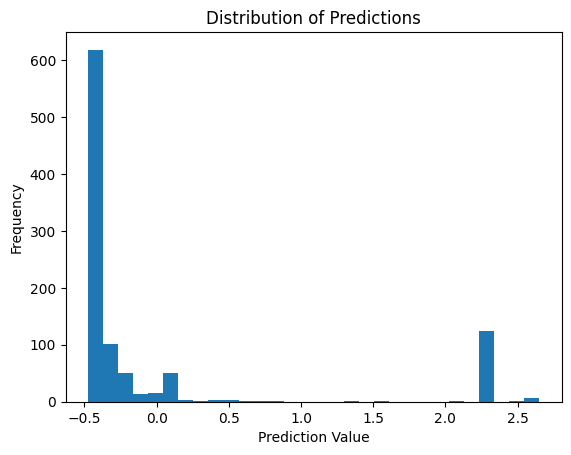

In [37]:
import matplotlib.pyplot as plt

plt.hist(final_predictions, bins=30)
plt.title("Distribution of Predictions")
plt.xlabel("Prediction Value")
plt.ylabel("Frequency")
plt.show()